
**Programming Assignment-1**

Biuld a CNN model to classify the MNIST handwrittendigits dataset.

Try to get an accuracy over 98.2%

Use different loss function (Adam, SGD, RMSProp)

Analyze the affect of using and not using data normalization.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt


os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


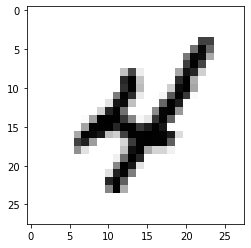

In [3]:
digit = 9 
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

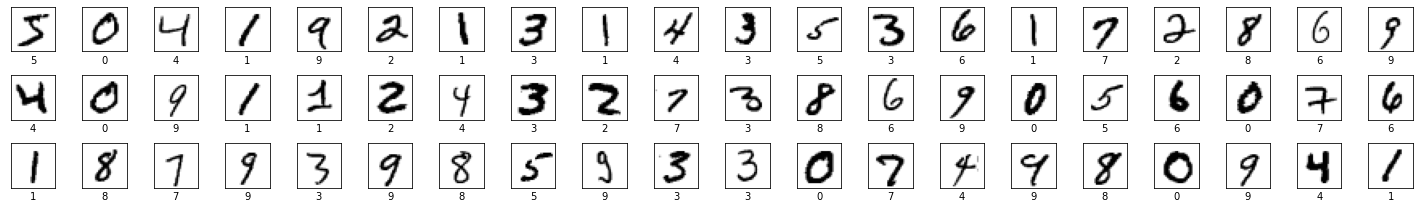

In [4]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [5]:
#with normalization
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0


#without normalization
x2_train = x_train.reshape(-1, 28,28,1)
x2_test = x_test.reshape(-1, 28,28,1)


print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of x_train: {x2_train.shape}")
print(f"Shape of x_test: {x2_test.shape}")

Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)
Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)


Image (#9): Which is digit '4'


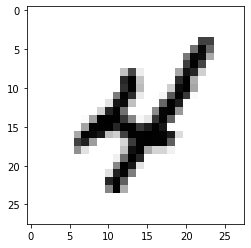

In [6]:
digit = 9 
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [7]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 9ms/step - loss: 0.2089 - accuracy: 0.9383 - val_loss: 0.0752 - val_accuracy: 0.9768
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.0615 - val_accuracy: 0.9823
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0598 - val_accuracy: 0.9830
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0533 - val_accuracy: 0.9835
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0574 - val_accuracy: 0.9846
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0638 - val_accuracy: 0.9841
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0832 - val_accuracy: 0.9813
Epoch 

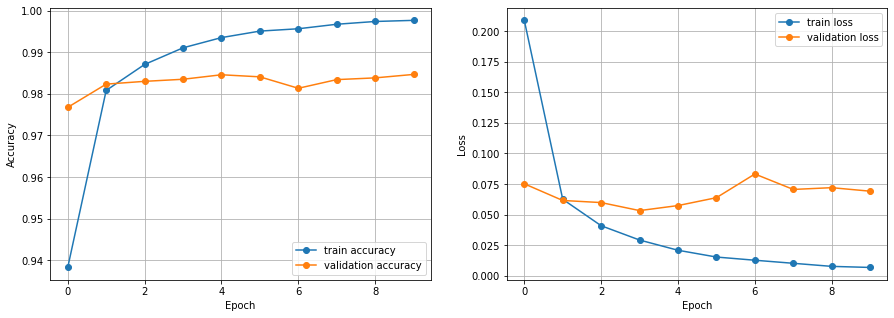

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0559 - accuracy: 0.9875

Test accuracy: 0.987500011920929


In [12]:
predictions = model.predict(x_test)

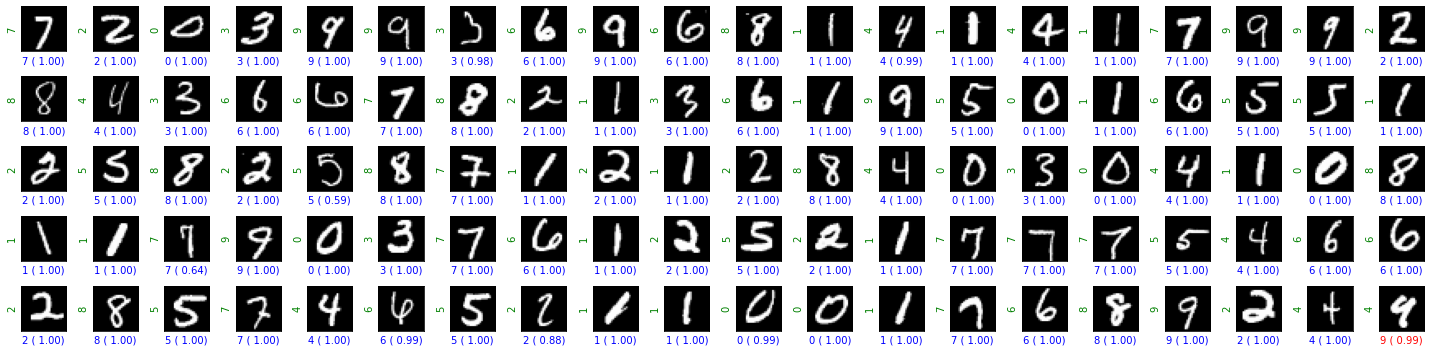

In [13]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

**Without Normalization**

In [14]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
h2 = model.fit(x=x2_train, y=y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.2108 - accuracy: 0.9355 - val_loss: 0.0783 - val_accuracy: 0.9783
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0606 - accuracy: 0.9823 - val_loss: 0.0623 - val_accuracy: 0.9814
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0608 - val_accuracy: 0.9818
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0603 - val_accuracy: 0.9840
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0616 - val_accuracy: 0.9835
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0660 - val_accuracy: 0.9829
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0699 - val_accuracy: 0.9848
Epoch 

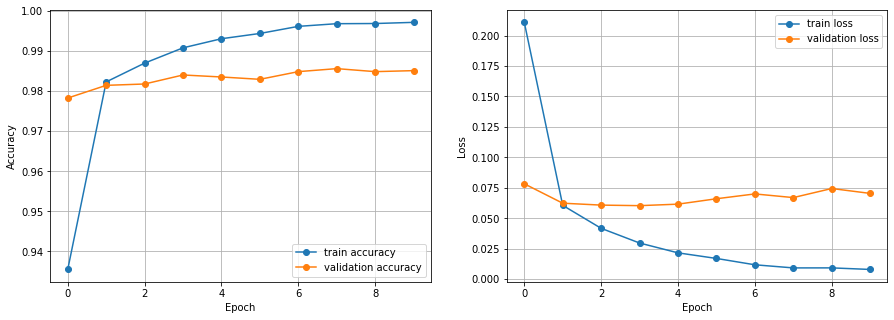

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0583 - accuracy: 0.9852

Test accuracy: 0.9851999878883362


We can see that using adam without normalization and with normalization data. With Normalization, the accuracy of validation data is 98.47% and the error of validation data is 6.91%. In test data, the accuracy is 98.75%.

Without Normalization, the accuracy of validation data is 98.51% and the error of validation data is 7.04%. In test data, the accuracy is 98.51%.

**SGD** 

With and without normalization

In [19]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [21]:
h2 = model.fit(x=x2_train, y=y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.7584 - accuracy: 0.8011 - val_loss: 0.3293 - val_accuracy: 0.9037
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3515 - accuracy: 0.8968 - val_loss: 0.3018 - val_accuracy: 0.9138
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3207 - accuracy: 0.9071 - val_loss: 0.2862 - val_accuracy: 0.9198
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3027 - accuracy: 0.9132 - val_loss: 0.2732 - val_accuracy: 0.9244
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2847 - accuracy: 0.9182 - val_loss: 0.2554 - val_accuracy: 0.9279
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2645 - accuracy: 0.9245 - val_loss: 0.2420 - val_accuracy: 0.9327
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2440 - accuracy: 0.9310 - val_loss: 0.2241 - val_accuracy: 0.9388
Epoch 

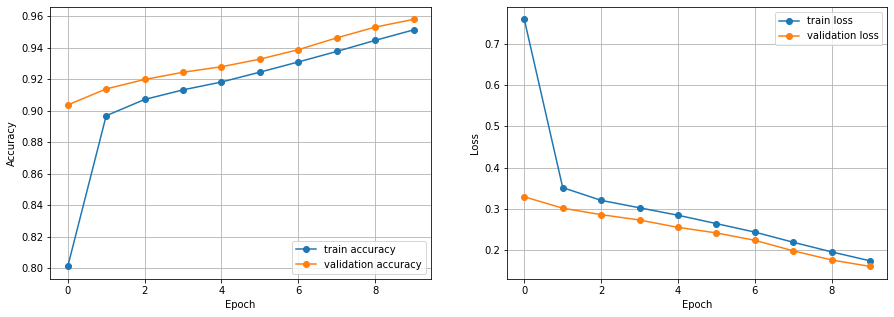

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [23]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [25]:
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.6898 - accuracy: 0.8194 - val_loss: 0.3743 - val_accuracy: 0.8877
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3505 - accuracy: 0.8977 - val_loss: 0.3181 - val_accuracy: 0.9073
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3247 - accuracy: 0.9051 - val_loss: 0.2988 - val_accuracy: 0.9146
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3071 - accuracy: 0.9111 - val_loss: 0.2780 - val_accuracy: 0.9211
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2916 - accuracy: 0.9170 - val_loss: 0.2669 - val_accuracy: 0.9240
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2773 - accuracy: 0.9212 - val_loss: 0.2573 - val_accuracy: 0.9283
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2583 - accuracy: 0.9266 - val_loss: 0.2358 - val_accuracy: 0.9362
Epoch 

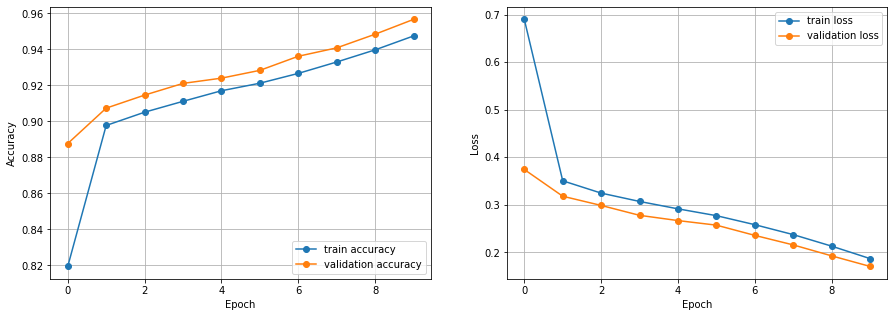

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

We can see that using SGD without normalization and with normalization data. With Normalization, the accuracy of validation data is 95.67% and the error of validation data is 17.06%. 

Without Normalization, the accuracy of validation data is 95.80% and the error of validation data is 16.09%.

**RMSProp**

In [27]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [29]:
h2 = model.fit(x=x2_train, y=y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.1875 - accuracy: 0.9427 - val_loss: 0.0822 - val_accuracy: 0.9768
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0624 - accuracy: 0.9816 - val_loss: 0.0614 - val_accuracy: 0.9818
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.0516 - val_accuracy: 0.9858
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0322 - accuracy: 0.9907 - val_loss: 0.0530 - val_accuracy: 0.9843
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0519 - val_accuracy: 0.9866
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0557 - val_accuracy: 0.9861
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.0607 - val_accuracy: 0.9846
Epoch 

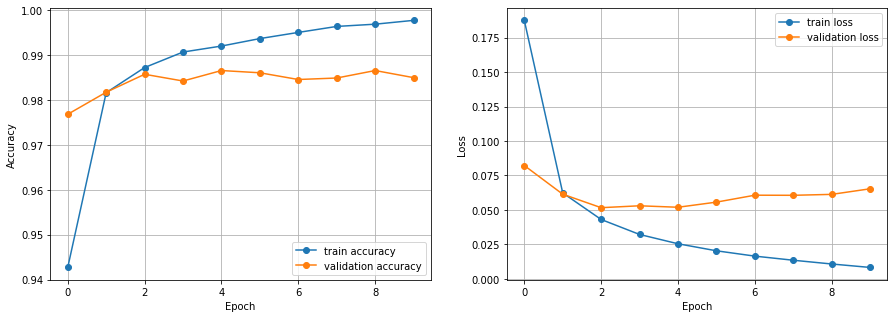

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [31]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [33]:
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1864 - accuracy: 0.9441 - val_loss: 0.0900 - val_accuracy: 0.9743
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0637 - accuracy: 0.9814 - val_loss: 0.0649 - val_accuracy: 0.9816
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0564 - val_accuracy: 0.9843
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0339 - accuracy: 0.9901 - val_loss: 0.0510 - val_accuracy: 0.9860
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0271 - accuracy: 0.9923 - val_loss: 0.0595 - val_accuracy: 0.9839
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0217 - accuracy: 0.9935 - val_loss: 0.0587 - val_accuracy: 0.9852
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0182 - accuracy: 0.9948 - val_loss: 0.0555 - val_accuracy: 0.9858
Epoch

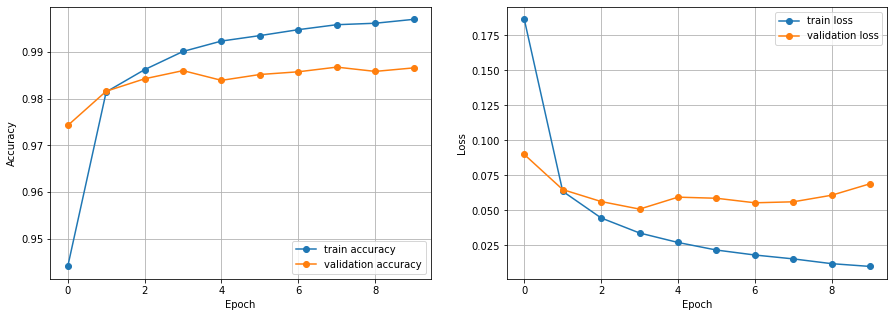

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

We can see that using RMSProp without normalization and with normalization data. With Normalization, the accuracy of validation data is 99.66% and the error of validation data is 6.91%. 

Without Normalization, the accuracy of validation data is 98.50% and the error of validation data is 6.53%.